In [4]:
#Data from: https://snap.stanford.edu/data/roadNet-CA.txt.gz

#1. Via Docker
  #1. Download data from https://snap.stanford.edu/data/roadNet-CA.txt.gz use of tqdm to show the installation is optional.
  #2. Unzip the file.



#4. Now try getting the first 200 Node IDs from roadNet-CA.txt and once again create a Directed Graph. And again Nodes that do not have a neighbour set these as cornors.

#Help if needed: https://www.python-course.eu/graphs_python.php
import sys
import os
sys.path.append(os.path.abspath('../modules'))

import webget
from tqdm import tqdm
import gzip
import networkx as nx

#tqdm(webget.download('https://snap.stanford.edu/data/roadNet-CA.txt.gz', to='./data/roadnet_data.txt.gz'))

#with gzip.open('data/roadnet_data.txt.gz', 'rb') as f_in:
    #rn_data = f_in.read()
    #with open('data/roadnet_data.txt', 'wb') as f_out:
        #f_out.write(rn_data)

g = nx.read_edgelist('data/roadnet_data.txt')



Name: 
Type: Graph
Number of nodes: 1965206
Number of edges: 2766607
Average degree:   2.8156


87787225
{'25': {}, '28': {}, '29': {}}
['25', '28', '29', '27']
['25', '28', '29', '27']
[(25, 23), (25, 26), (25, 27), (28, 27), (29, 27), (29, 30), (29, 3255), (27, 25), (27, 28), (27, 29)]
['25', '28', '29', '27', '23', '26', '30', '3255']
Name: 
Type: DiGraph
Number of nodes: 16
Number of edges: 10
Average in degree:   0.6250
Average out degree:   0.6250


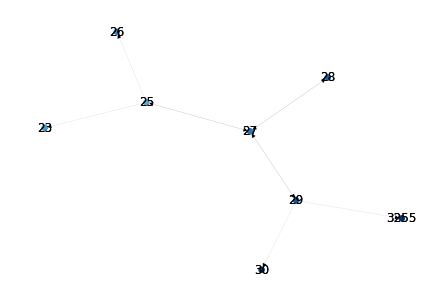

In [21]:
#2. Print out the length of roadNet-CA.txt and find the Node ID '27'.
  #1. Find the neighbours of 27 and print these out


import pygraphviz
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout, write_dot

with open('data/roadnet_data.txt', 'rb') as f_out:
    print(len(f_out.read()))

#g = nx.read_edgelist('data/roadnet_data.txt')
print(g['27'])

  #2. With this knowledge create a small Directed Graph of this data. For the neighbours that are not 'known',
     #add these as cornors (without a connection further)
        
paths = []
node_list = list(g.neighbors('27'))
node_list.append('27')
print(node_list)

all_node_list = node_list[:]
print(all_node_list)

for node in node_list:
    neighbors = g.neighbors(node)
    for n in neighbors:
        paths.append((int(node), int(n)))
        if n not in all_node_list:
            all_node_list.append(n)
            
print(paths)
print(all_node_list)

graph = nx.DiGraph()
graph.add_nodes_from(all_node_list)
graph.add_edges_from(paths)

#3. Find the amount of Edges of roadNet-CA.txt and Nodes and print these out
print(nx.info(g))





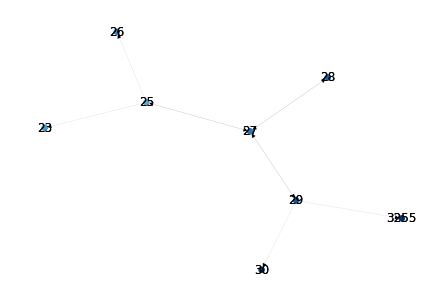

In [22]:
#3. Visualize this data using networkx and pygraphviz
nx.draw(graph, pos=graphviz_layout(graph), 
            node_size=30, width=.05, cmap=plt.cm.Blues, 
            with_labels=True, node_color=range(len(graph)))